In [1]:
import numpy as np
import pandas as pd
import scipy.stats as scs

%matplotlib inline
import matplotlib.pyplot as plt

/Users/matthewdrury/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


# Law of Large Numbers Investigation

In this assignment we will do some investigation into the law of large numbers.  This will give us a nice chance to practice using scipy to generate sequences of random numbers from various distributions, and use matplotlib to display the results of our investigations.  These two tools will be with us for the rest of the course, so it's a good idea to spend a bit of time using them in a comfortable scenario.

## The Law of Large Numbers

Recall that the law of large numbers is our first example of a mathematical link between a population and a sample from that population.  It (approximately) states that in large samples, the mean of the sample is close to the expected value of the population from which the sample was drawn.

$$ \frac{X_1 + X_2 + \cdots + X_n}{n} \rightarrow E[X] \text{ as } n \rightarrow \infty $$

Let's play with this idea with different populations.

1. To begin, setup the following imports in your python file or notebook:

```python
import numpy as np
import scipy.stats as scs

%matplotlib inline
import matplotlib.pyplot as plt
```

## Part 1: Coin Flips

Let's validate that the law of large numbers holds for coin flips and dice, which is the original context where [Gerolamo Cardano](https://en.wikipedia.org/wiki/Gerolamo_Cardano) discovered the law.

Since the results of coin flips are *not* numeric, we will need to make some convention to encode heads and tails as numeric values.  The traditional choice is `HEADS => 1, TAILS => 0`.

We can then flip a fair coin ten times using `scipy.stats` (which we imported under the name `scs`):

```python
scs.binom.rvs(n=1, p=0.5, size=10)
```

By a **fair** coin, we mean a coin with equal chance of landing heads or tails.  Below, we will refer to the probability of a coin landing heads as the **fairness** of the coin.

1. Write a coin flipping function which flips *any* coin (may be unfair) a specified number of times.  Your function signature should look like this:

```python
def flip_coin(n_flips, p=0.5):
    # This part is your job.
```

In [2]:
def flip_coin(n_flips, p=0.5):
    return scs.binom.rvs(n=1, p=p, size=n_flips)

1. Flip a fair coin 1000 times with your function.  What will the sample average of these flips be and why?  Use `np.mean` to check.

#### Answer

The law of large numbers applies to this situation.  If we denote by $C$ a random variable that represents a coin flip, and $C_1, C_2, \ldots$ the **individual** flips in our sequence, then the law of large numbers says that:

$$ \frac{C_1 + C_2 + \cdots + C_{1000}}{1000} \approx E[C] = 0.5 $$

So the sample mean should be approximately one half.

In [3]:
flips = flip_coin(1000)
print("The proportion of heads in 1000 flips is {:2.3f}".format(np.mean(flips)))

The proportion of heads in 1000 flips is 0.484


1. Flip an **unfair** coin 1000 times.  What will the sample average be now?  How would you expect the answer to change depending on how extreme the unfairness is?  Use `np.mean` to check your result.

#### Answer

This is the same calculation as above, with only the value of $E[C]$ changing (it is equal to the fairness of the coin).

In [4]:
fairnesses = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for fairness in fairnesses:
    flips = flip_coin(1000, p=fairness)
    print("The proportion of heads in 1000 flips of a {:1.1f} fair coin is {:2.3f}".format(
        fairness, np.mean(flips)))

The proportion of heads in 1000 flips of a 0.0 fair coin is 0.000
The proportion of heads in 1000 flips of a 0.1 fair coin is 0.103
The proportion of heads in 1000 flips of a 0.2 fair coin is 0.205
The proportion of heads in 1000 flips of a 0.3 fair coin is 0.283
The proportion of heads in 1000 flips of a 0.4 fair coin is 0.392
The proportion of heads in 1000 flips of a 0.5 fair coin is 0.499
The proportion of heads in 1000 flips of a 0.6 fair coin is 0.570
The proportion of heads in 1000 flips of a 0.7 fair coin is 0.688
The proportion of heads in 1000 flips of a 0.8 fair coin is 0.805
The proportion of heads in 1000 flips of a 0.9 fair coin is 0.896
The proportion of heads in 1000 flips of a 1.0 fair coin is 1.000


1. Now let's see how this all depends on the size of the sample.  Create a list with a range of sample sizes, starting at 10, and counting up to 1000 in increments of 10 (`list(range(...))` can be used for this).  Now, for each of these sample sizes, repeat the experiments above.  How does the accuracy of the results depend on the sample size?

#### Answer

According to the law of large numbers, the accuracy of the approximation should increase as the sample we base it on gets larger.

In [5]:
sample_sizes = range(10, 1000, 10)
sample_means = []

for sample_size in sample_sizes:
    sample_means.append(np.mean(flip_coin(sample_size)))
    
# print(sample_means)

1. You're probably feeling like looking at a list of one-hundred numbers is not so illuminating, so *plot them*!  Make a line plot where the x-axis shows the sample size, and the y-axis show the sample mean.  Also include a horizontal line for the *population* value of the expectation.

Text(0,0.5,'Proportion of Heads')

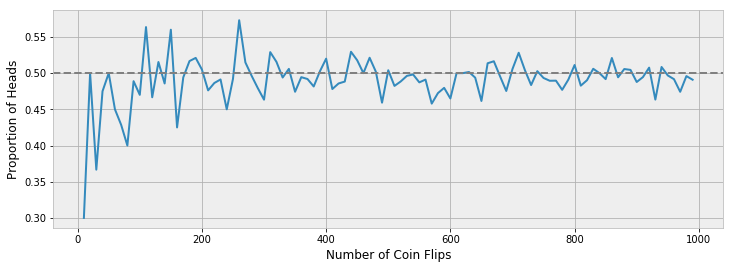

In [6]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(sample_sizes, sample_means)
ax.axhline(y=0.5, color='grey', linestyle='--')
ax.set_xlabel("Number of Coin Flips")
ax.set_ylabel("Proportion of Heads")

1. Since we are studying a random quantity, it's a good idea to try any experiment *multiple times* and look for patterns not just within one experiment, but amongst the different experiments.Run the above experiment 100 times, and plot all 100 resulting paths on the same axis.  

You will probably want to write a function that makes *one* path of sample means:

```python
def make_sample_mean_path(begin, end, step, p=0.5):
    # This part is up to you
```

And then use this inside a for loop to make the plots.

Describe the pattern that the paths make as a whole.  What do you think causes this pattern?

In [7]:
def make_sample_mean_path(begin, end, step, p=0.5):
    sample_sizes = range(begin, end, step)
    sample_means = []
    for sample_size in sample_sizes:
        sample_means.append(np.mean(flip_coin(sample_size, p=p)))
    return sample_means

Text(0.5,1,'100 Repeats of Coin Flipping Experiment')

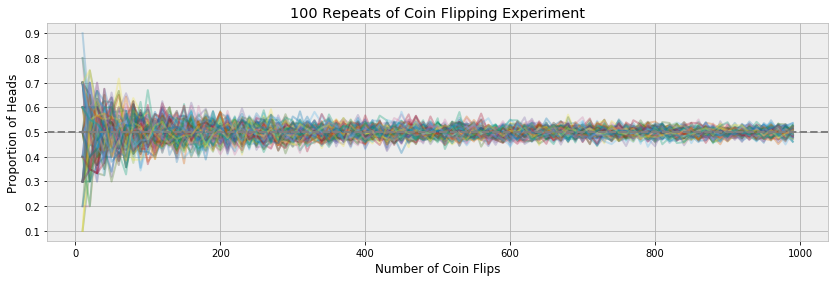

In [8]:
n_paths = 100

fig, ax = plt.subplots(figsize=(14, 4))

sample_sizes = range(10, 1000, 10)
for _ in range(n_paths):
    ax.plot(sample_sizes, make_sample_mean_path(10, 1000, 10), alpha=0.3)

ax.axhline(y=0.5, color='grey', linestyle='--')
ax.set_xlabel("Number of Coin Flips")
ax.set_ylabel("Proportion of Heads")
ax.set_title("100 Repeats of Coin Flipping Experiment")

1. Finally, let's explore what happens when we change the fairness of the coin.  Use subplots to draw the same picture as the above, but for different values of the coin fairness (I suggest 0.1, 0.25, 0.5, 0.75 and 0.9).  This may take a few seconds to run!

Text(0.06,0.5,'Sample Mean')

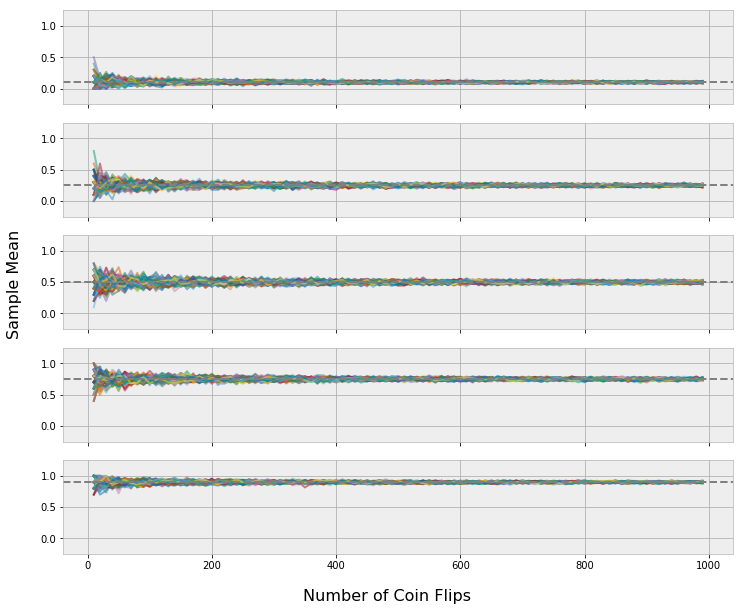

In [9]:
n_paths = 100
ps = [0.1, 0.25, 0.5, 0.75, 0.9]

fig, axs = plt.subplots(5, 1, figsize=(12, 10))

sample_sizes = range(10, 1000, 10)
for idx, (p, ax) in enumerate(zip(ps, axs.flatten())):
    ax.set_ylim(-0.25, 1.25)
    for _ in range(n_paths):
        ax.plot(sample_sizes, make_sample_mean_path(10, 1000, 10, p=p), alpha=0.5)
    ax.axhline(y=p, color='grey', linestyle='--')
    if not idx == len(axs.flatten()) - 1:
        ax.set_xticklabels([])
    
fig.text(0.5, 0.06, 'Number of Coin Flips', ha='center', fontsize=16)
fig.text(0.06, 0.5, 'Sample Mean', va='center', rotation='vertical', fontsize=16)

1. You should notice that the width of the bands is greater for fair coins compared to very unfair coins.  This makes sense, for a fair coin the result of the flips is maximally inconsistent, where very unfair coins tend to give the same result often.

We can measure this with the concept of *variance* or *standard deviation* as follows.

Set up a grid of fairness values for your coins:

```python
fairnesses = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
```

For each value of fairness, flip a coin of that fairness 100 times, and then calculate the sample mean of the result (as we have been doing).  But now take an extra step: repeat this process 100 times, getting 100 sample means for each value of the coin fairness.  Take the variance of *these* sample means.  Plot the results vs the fairness of the coin.

In [10]:
fairnesses = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

sample_variances = []
for fairness in fairnesses:
    sample_means = []
    for _ in range(100):
        sample_means.append(np.mean(flip_coin(10, p=fairness)))
    sample_variances.append(np.var(sample_means))    

Text(0,0.5,'Variance of Sample Means')

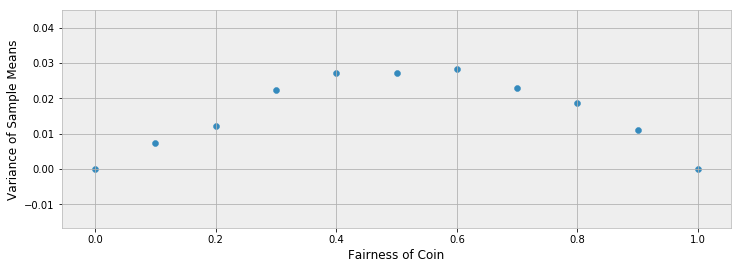

In [11]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.scatter(fairnesses, sample_variances)
ax.set_xlabel("Fairness of Coin")
ax.set_ylabel("Variance of Sample Means")

## Part 2: Poisson Draws

The miracle of the law of large numbers is that it applies to samples from *any* population.  Let's try seeing how things work when drawing from a *Poisson* distribution.

**A Reminder:** The **Poisson** distribution is used to model *counts* of events that happen at a fixed rate over a fixed time period.  So, for example, the number of times I observe a chunk of uranium emit a radioactive particle in one minute is Poisson distributed.  The **rate** is the only parameter of the Poisson distribution, and it is often notated as $\lambda$.  The probability mass function of the Poisson distribution is:

$$ f_{\text{poisson}}(k) = \frac{\lambda^k e^\lambda}{k!} $$

1. Repeat all your above work on the coin flip distribution for the Poisson distribution.  You'll want to start with a function like this, which is analogous to our `flip_coin` function from before:

```python
def sample_poisson(sample_size, lam=1.0):
    return scs.poisson.rvs(lam, size=sample_size)
```

In [12]:
def sample_poisson(sample_size, lam=1.0):
    return scs.poisson.rvs(lam, size=sample_size)

def make_poisson_sample_mean_path(begin, end, step, lam=1.0):
    sample_sizes = range(begin, end, step)
    sample_means = []
    for sample_size in sample_sizes:
        sample_means.append(np.mean(sample_poisson(sample_size, lam=lam)))
    return sample_means

In [13]:
sample_sizes = range(10, 1000, 10)
poisson_means = make_poisson_sample_mean_path(10, 1000, 10)

Text(0,0.5,'Sample Mean')

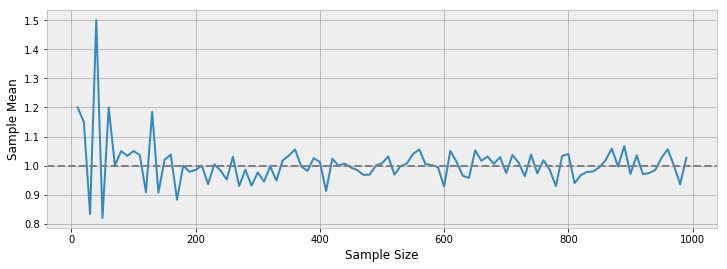

In [14]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(sample_sizes, poisson_means)
ax.axhline(y=1.0, color='grey', linestyle='--')
ax.set_xlabel("Sample Size")
ax.set_ylabel("Sample Mean")

Text(0,0.5,'Sample Mean')

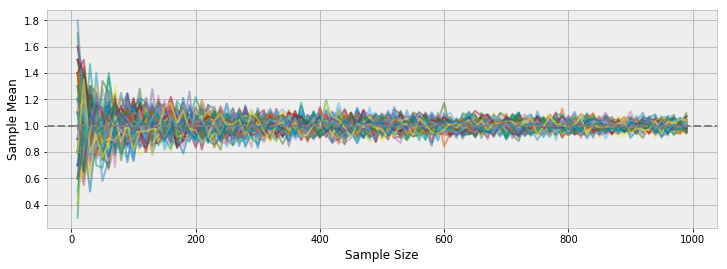

In [15]:
n_paths = 100

fig, ax = plt.subplots(figsize=(12, 4))

sample_sizes = range(10, 1000, 10)
for _ in range(n_paths):
    ax.plot(sample_sizes, make_poisson_sample_mean_path(10, 1000, 10), alpha=0.5)

ax.axhline(y=1.0, color='grey', linestyle='--')
ax.set_xlabel("Sample Size")
ax.set_ylabel("Sample Mean")

Text(0.06,0.5,'Sample Mean')

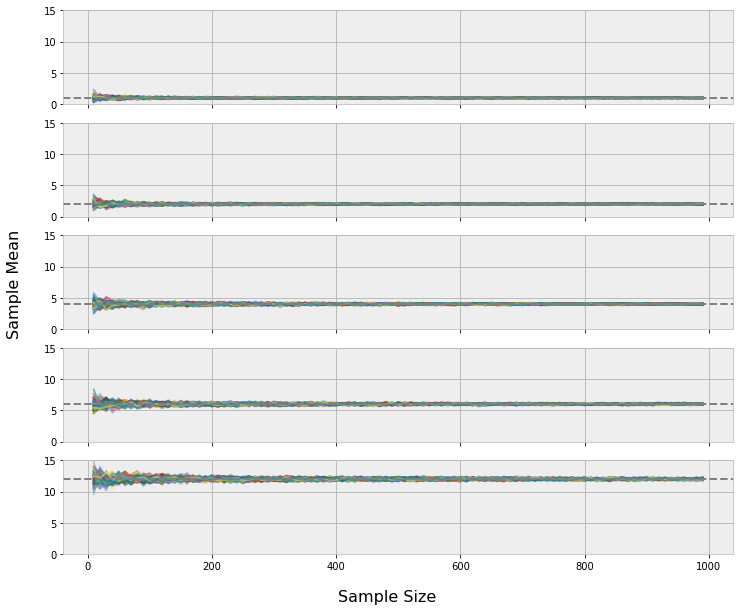

In [16]:
n_paths = 100
lams = [1.0, 2.0, 4.0, 6.0, 12.0]

fig, axs = plt.subplots(5, 1, figsize=(12, 10))

sample_sizes = range(10, 1000, 10)
for idx, (lam, ax) in enumerate(zip(lams, axs.flatten())):
    ax.set_ylim(0.0, 15.0)
    for _ in range(n_paths):
        ax.plot(sample_sizes, make_poisson_sample_mean_path(10, 1000, 10, lam=lam), alpha=0.5)
    ax.axhline(y=lam, color='grey', linestyle='--')
    if not idx == len(axs.flatten()) - 1:
        ax.set_xticklabels([])
    
fig.text(0.5, 0.06, 'Sample Size', ha='center', fontsize=16)
fig.text(0.06, 0.5, 'Sample Mean', va='center', rotation='vertical', fontsize=16)

In [17]:
rates = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

sample_variances = []
for rate in rates:
    sample_means = []
    for _ in range(100):
        sample_means.append(np.mean(sample_poisson(100, lam=rate)))
    sample_variances.append(np.var(sample_means))  

Text(0,0.5,'Variance of Sample Means')

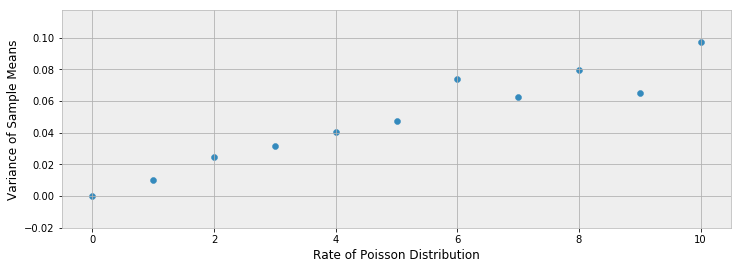

In [18]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.scatter(rates, sample_variances)
ax.set_xlabel("Rate of Poisson Distribution")
ax.set_ylabel("Variance of Sample Means")

## Part 3: A Mixture Distribution

We will finish our experiments with the concept of a **mixture distribution**.

Mixture distributions are useful when we suspect that a population we are studying is made up of several different subpopulations.  For example, at least approximately, the human population is made up of males and females, and this is reflected in the distribution of biological or social statistics.

Drawing from a mixture distribution is a two step process:
  
  - First (randomly) select one of the subpopulations to draw from.
  - Draw a datum from that subpopulation.
  
For example, to draw a random human height, we would first need a random human.  We can envision this as first choosing either "male" or "female" at random (though **not equally likely**, randomly **does not mean** equally likely), and then measure the height of a randomly chosen human from the chosen subpopulation.


![Schematic of Drawing from a Mixture Distribution](images/draw-from-mixture.png)

Notice that drawing from a (two subpopulation) mixture requires two pieces of information:

  - The probabilities of drawing from each subpopulation.
  - The distribution of the two subpopulations.
  
In the above example, since there are more male humans than female humans, the probability of choosing the male subpopulation must be greater than the probability of drawing from the female subpopulation (the true weights are approximately 107/207 to 100/207).

In this assignment, we will sample from a mixture of two Poissons, and verify that the law of large numbers holds for this mixture distribution (remember, it should work for **any** distribution).

1. Write a function called `sample_poisson_mixture` that samples from a mixture of two Poisson distributions.  You will need to include as arguments the lambda parameters of the two Poissons, and the probability of sampling from one Poisson over the other:

```python
def sample_poisson_mixture(sample_size, lam1, lam2, p=0.5):
    # It's up to you.
```

In [19]:
def sample_poisson_mixture(sample_size, lam1=5.0, lam2=20.0, p=0.5):
    choices = flip_coin(sample_size, p=p)
    poisson1 = sample_poisson(sample_size, lam=lam1)
    poisson2 = sample_poisson(sample_size, lam=lam2)
    # This is a standard numpy trick that avoids an expensive if/then.
    return choices * poisson1 + (1 - choices) * poisson2

1. Draw a large sample from a mixture of Poissons with very different lambda parameters (5 and 20 work well).  Draw a histogram of this sample, what do you see?  Can you explain the geometric features of this histogram.

In [20]:
mixture = sample_poisson_mixture(100000, lam1=5.0, lam2=20.0, p=0.5)

Text(0.5,1,'Histogram of Draws from Poisson Mixture')

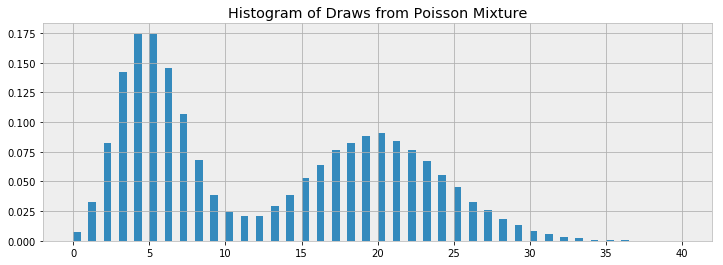

In [21]:
fig, ax = plt.subplots(figsize=(12, 4))

n_bins = mixture.max()
_ = ax.hist(mixture, bins=n_bins*2, normed=True)

ax.set_title("Histogram of Draws from Poisson Mixture")

#### Answer

The histogram approximates the probability mass function of the mixture distribution.  Each possible value that can be sampled from the mixture may have come from one of two places - either the first subpopulation or the second.

The bimodal nature of this histogram reflects the fact that we are really looking at draws from two subpopulations.  The mode on the left corresponds to the `Poisson(lambda=5.0)` subpopulation, and the mode to the right corresponds to the `Poisson(lambda=20.0)` subpopulation.  In the middle, we have draws that are likely to have come from either, so these two subpopulations get "mixed up" in the middle.

1. Make a few subplots that show what happens as the mixture parameter `p` varies.  Before running your code, try to sketch out an answer for what you think the histograms will look like.  It's always good to try to guess an answer before you know the truth, if you're incorrect, you should analyse where your reasoning when wrong.

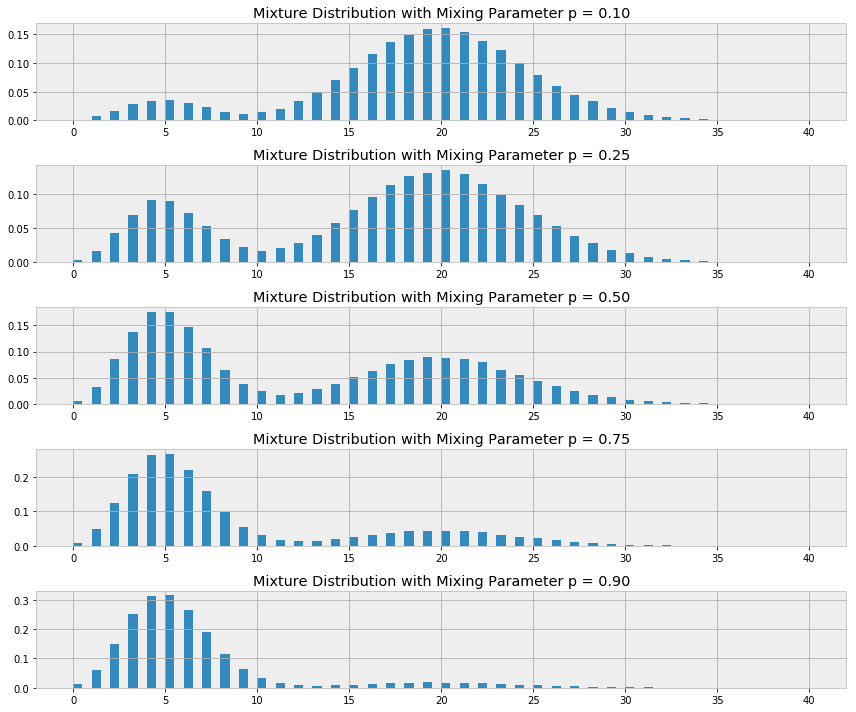

In [22]:
ps = [0.1, 0.25, 0.5, 0.75, 0.9]

fig, axs = plt.subplots(5, 1, figsize=(12, 10))

for p, ax in zip(ps, axs.flatten()):
    mixture = sample_poisson_mixture(100000, lam1=5.0, lam2=20.0, p=p)    
    ax.hist(mixture, bins=40*2, range=(0, 40), normed=True)
    ax.set_title("Mixture Distribution with Mixing Parameter p = {:2.2f}".format(p))
fig.tight_layout()

1. Calculate the true expected value of a mixture of two Poissons.  This is a more subtle calculation than you may be used to.  You will need to use the [Law of Total Expectation](https://en.wikipedia.org/wiki/Law_of_total_expectation).  

Hint: Our case is covered by the second formula in the preamble to the above wikipedia article.  To apply it, partition all the possibilities according to whether we selected the first or second subpopulation.  In the notation of the wikipeda article:

$$ A_1 = \text{We draw from the first Poisson Subpopulation} $$
$$ A_2 = \text{We draw from the second Poisson subpopulation} $$

#### Answer

Let's let $X$ be a random variable for our mixture distribution.

Using the statement of the law of total expectation fro wikipedia we get:

$$ E[X] = E[X \mid A_1] P(A_1) + E[X \mid A_2] P(A_2) $$

Now we have to think about what these symbols mean.  The probabilities $P(A_1), P(A_2)$ are the mixture probabilities, the chances we draw from either of these two subpopulations:

$$ P(A_1) = p $$
$$ P(A_2) = 1 - p $$

The conditional expectations are a little more tricky, and you may not have thought about this concept before.  If not, please set aside some time to read [Something](some url).

In our case, the conditional expectation `E[X \mid A_1]` means

> The expected value of the mixture distribution if we **know** we are drawing from the second subpopulation.

This is intuitively just the expected value of our second subpopulation, which is `Poisson(lambda=5.0)` distributed.  The expected value of a Poisson random variable is [just the rate parameter](https://en.wikipedia.org/wiki/Poisson_distribution), so

$$ E[X \mid A_1] = 5.0 $$

Similarly

$$ E[X \mid A_2] = 20.0 $$

So, alltogether:

$$ E[X] = 5p + 20(1 - p) = 20 - 15p $$

Which can be as large as 20 (when $p = 0$) or as small as 5 (when $p = 1$), which makes sense.

1. Encode your calculation from the previous exercise into a python function:

```python
def poisson_mixture_expectation(lam1=5.0, lam2=20.0, p=0.5):
    # You can do it!
```

In [23]:
def poisson_mixture_expectation(lam1=5.0, lam2=20.0, p=0.5):
    return lam1 * p + lam2 * (1 - p)

1. Repeat your work for the coin flip and Poisson distributions for the Poisson mixture with mixture parameter 0.5.  Verify that this is consistent with your calculation of the population expectation (i.e. the calculation you used the law of total expectation for).

In [24]:
def make_poisson_mixture_sample_mean_path(begin, end, step, lam1=5.0, lam2=20.0, p=0.5):
    sample_sizes = range(begin, end, step)
    sample_means = []
    for sample_size in sample_sizes:
        sample_means.append(np.mean(
            sample_poisson_mixture(sample_size, lam1=lam1, lam2=lam2, p=p)))
    return sample_means

In [25]:
mixture_expectation = poisson_mixture_expectation() 
mixture_means = make_poisson_mixture_sample_mean_path(10, 1000, 10)

Text(0,0.5,'Sample Mean')

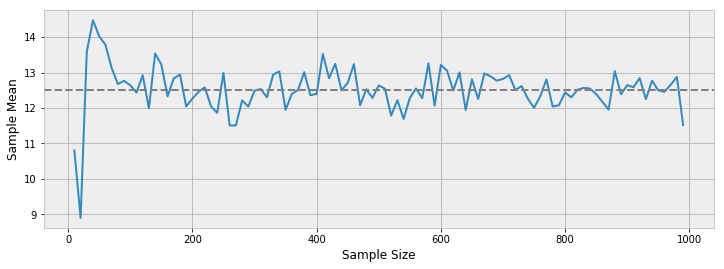

In [26]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(sample_sizes, mixture_means)
ax.axhline(y=mixture_expectation, color='grey', linestyle='--')
ax.set_xlabel("Sample Size")
ax.set_ylabel("Sample Mean")

Text(0,0.5,'Sample Mean')

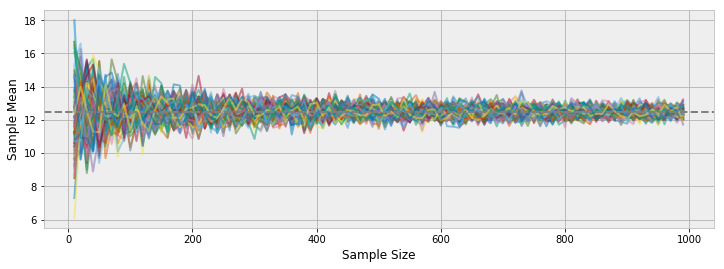

In [27]:
n_paths = 100

fig, ax = plt.subplots(figsize=(12, 4))

sample_sizes = range(10, 1000, 10)
for _ in range(n_paths):
    mixture_means = make_poisson_mixture_sample_mean_path(10, 1000, 10)
    ax.plot(sample_sizes, mixture_means, alpha=0.5)

ax.axhline(y=poisson_mixture_expectation(), color='grey', linestyle='--')
ax.set_xlabel("Sample Size")
ax.set_ylabel("Sample Mean")

1. Vary the mixture parameter `p` and make multiple subplots showing how this affects the sample mean paths.  Don't forget to indicate the population expectation somehow (a horizontal line works well).

Text(0.06,0.5,'Sample Mean')

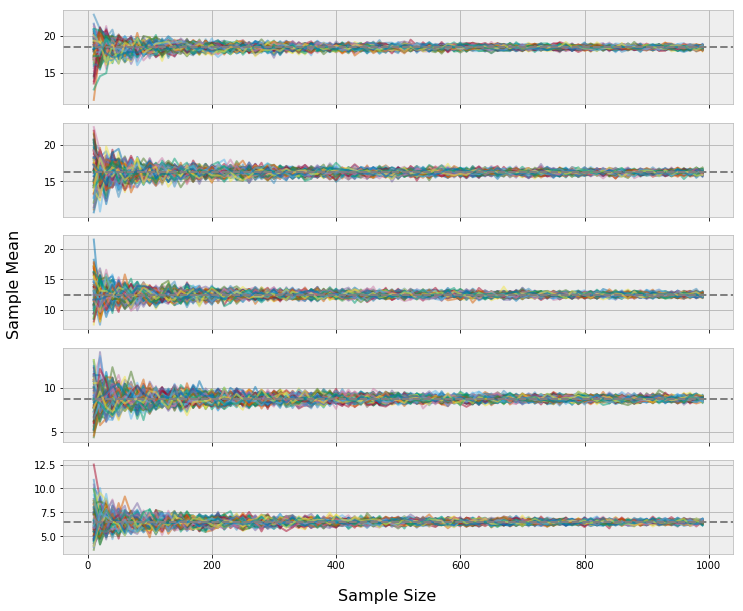

In [28]:
n_paths = 100
ps = [0.1, 0.25, 0.5, 0.75, 0.9]

fig, axs = plt.subplots(5, 1, figsize=(12, 10))

sample_sizes = range(10, 1000, 10)
for idx, (p, ax) in enumerate(zip(ps, axs.flatten())):
    for _ in range(n_paths):
        ax.plot(sample_sizes, make_poisson_mixture_sample_mean_path(
            10, 1000, 10, p=p), alpha=0.5)
    sample_expectation = poisson_mixture_expectation(p=p)
    ax.axhline(y=sample_expectation, color='grey', linestyle='--')
    if not idx == len(axs.flatten()) - 1:
        ax.set_xticklabels([])
    
fig.text(0.5, 0.06, 'Sample Size', ha='center', fontsize=16)
fig.text(0.06, 0.5, 'Sample Mean', va='center', rotation='vertical', fontsize=16)